In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Data Preparation

In [0]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
df = pd.read_csv(r'C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset\datatraining.csv', header=0, index_col='date', date_parser = dateparse )
#df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [0]:
df.columns

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
scaler.fit(np.array(df[columns]))
df[columns] = scaler.transform(np.array(df[columns]))

In [0]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,2.518470,0.278526,1.573763,0.364948,1.091757,1
2015-02-04 17:51:59,2.488967,0.277713,1.591735,0.341881,1.080555,1
2015-02-04 17:53:00,2.488967,0.273645,1.573763,0.340290,1.075888,1
2015-02-04 17:54:00,2.488967,0.265508,1.573763,0.323587,1.066555,1
2015-02-04 17:55:00,2.439796,0.265508,1.573763,0.311655,1.049523,1


In [0]:
class_name = 'Occupancy'

In [0]:
X = df[columns].values

In [0]:
y = df[class_name].values

In [0]:
X.shape

(8143, 5)

In [0]:
y.shape

(8143,)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [0]:
X_train.shape, y_train.shape


((5700, 5), (5700,))

In [0]:
X_test.shape, y_test.shape

((2443, 5), (2443,))

# Shapelet Discovery

https://tslearn.readthedocs.io/en/latest/gen_modules/shapelets/tslearn.shapelets.ShapeletModel.html#tslearn.shapelets.ShapeletModel

https://www.kaggle.com/group16/shapelets

In [0]:
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

Using TensorFlow backend.
C:\Users\Asia\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
len(set(y_train))

2

In [0]:
n_ts, ts_sz = X_train.shape[:2]
n_classes = len(set(y_train)) 

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 5700
ts_sz 5
n_classes 2
shapelet_sizes {1: 4}


In [0]:
# Define the shaplet model using parameters provided by the authors (except that we use
# fewer iterations here)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=200,
                        verbose=1)

In [0]:
shp_clf.fit(X_train, y_train)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/200
5700/5700 [==============================] - 1s 197us/step - loss: 1.2500 - binary_accuracy: 0.2144 - binary_crossentropy: 1.2296
Epoch 2/200
5700/5700 [==============================] - 0s 50us/step - loss: 1.0107 - binary_accuracy: 0.6407 - binary_crossentropy: 0.9929
Epoch 3/200
5700/5700 [==============================] - 0s 57us/step - loss: 0.8723 - binary_accuracy: 0.7877 - binary_crossentropy: 0.8559
Epoch 4/200
5700/5700 [==============================] - 0s 31us/step - loss: 0.7779 - binary_accuracy: 0.7877 - binary_crossentropy: 0.7627
Epoch 5/200
5700/5700 [==============================] - 0s 37us/step - loss: 0.7086 - binary_accuracy: 0.7877 - binary_crossentropy: 0.6943
Epoch 6/200
5700/5700 [==============================] - 0s 36us/step - loss: 0.6536 - binary_accuracy: 0.7877 - binar

5700/5700 [==============================] - 0s 55us/step - loss: 0.2128 - binary_accuracy: 0.8921 - binary_crossentropy: 0.1903
Epoch 110/200
5700/5700 [==============================] - 0s 36us/step - loss: 0.2126 - binary_accuracy: 0.8918 - binary_crossentropy: 0.1902
Epoch 111/200
5700/5700 [==============================] - 0s 57us/step - loss: 0.2125 - binary_accuracy: 0.8921 - binary_crossentropy: 0.1901
Epoch 112/200
5700/5700 [==============================] - 0s 42us/step - loss: 0.2124 - binary_accuracy: 0.8925 - binary_crossentropy: 0.1900
Epoch 113/200
5700/5700 [==============================] - 0s 49us/step - loss: 0.2122 - binary_accuracy: 0.8923 - binary_crossentropy: 0.1898
Epoch 114/200
5700/5700 [==============================] - 0s 50us/step - loss: 0.2121 - binary_accuracy: 0.8925 - binary_crossentropy: 0.1897
Epoch 115/200
5700/5700 [==============================] - 0s 83us/step - loss: 0.2120 - binary_accuracy: 0.8925 - binary_crossentropy: 0.1896
Epoch 116/200

ShapeletModel(batch_size=256, max_iter=200, n_shapelets_per_size={1: 4},
              optimizer='sgd', random_state=None, shapelet_length=0.15,
              total_lengths=3, verbose=1, verbose_level=None,
              weight_regularizer=0.01)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
predicted_labels = shp_clf.predict(X_test)
print("Correct classification rate:", accuracy_score(y_test, predicted_labels))

2443/2443 [==============================] - 0s 10us/step
Correct classification rate: 0.8931641424478101


In [0]:
predicted_labels = shp_clf.predict(X_train)
print("Correct classification rate:", accuracy_score(y_train, predicted_labels))

5700/5700 [==============================] - 0s 13us/step
Correct classification rate: 0.8989473684210526


In [0]:
predicted_locations = shp_clf.locate(X_test)

C:\Users\Asia\Anaconda3\lib\site-packages\tslearn\utils.py:63: UserWarning: 2-Dimensional data passed. Assuming these are 2443 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


2443/2443 [==============================] - 0s 76us/step


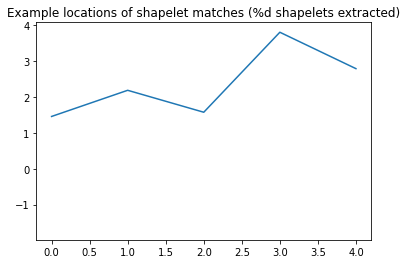

In [0]:
#in questo modo visualizzo le shaplet sulla prima istanza del dataset
ts_id = 0 #prima istanza
plt.figure()
n_shapelets = sum(shapelet_sizes.values())
plt.title("Example locations of shapelet matches "
          "(%d shapelets extracted)".format(n_shapelets))

plt.plot(X_test[ts_id].ravel())
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp] #qui allinea le serie con lo shaplet
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)
#utile per capire perchè una certa serie è classificata in base ad una certa label

## Shaplet Discovery 2

In [0]:
from shapelets_lts.classification import LtsShapeletClassifier

ModuleNotFoundError: No module named 'shapelets_lts'

https://github.com/mohaseeb/shaplets-python

In [0]:
shp_clf = LtsShapeletClassifier(
    K=10,
    R=1,
    L_min=10,
    epocs=10,
    lamda=0.01,
    eta=0.01,
    shapelet_initialization='segments_centroids',
    plot_loss=False
)
"""
:param K: number of shapelets
:param R: scales of shapelet lengths
:param L_min: minimum shapelet length
"""

'\n:param K: number of shapelets\n:param R: scales of shapelet lengths\n:param L_min: minimum shapelet length\n'

In [0]:
shp_clf.fit(X, y)

Network initialization ...
Using training data to initialize shaplets
Training ...
Using training data for validation
epoch=1/10 (iteration=12) loss=9.152756415388325 validation accuracy=0.3333333333333333
epoch=2/10 (iteration=24) loss=7.626020734091692 validation accuracy=0.3333333333333333
epoch=3/10 (iteration=36) loss=6.158452427453218 validation accuracy=0.3333333333333333
epoch=4/10 (iteration=48) loss=4.889924400542668 validation accuracy=0.3333333333333333
epoch=5/10 (iteration=60) loss=3.91293624679182 validation accuracy=0.3333333333333333
epoch=6/10 (iteration=72) loss=3.1993049403197 validation accuracy=0.3333333333333333
epoch=7/10 (iteration=84) loss=2.678257054709934 validation accuracy=0.4166666666666667
epoch=8/10 (iteration=96) loss=2.294665774902248 validation accuracy=0.5833333333333334
epoch=9/10 (iteration=108) loss=2.0123220214786017 validation accuracy=0.5
epoch=10/10 (iteration=120) loss=1.8056448317909788 validation accuracy=0.8333333333333334


LtsShapeletClassifier(K=10, L_min=10, R=1, alpha=-100, epocs=10, eta=0.01,
                      lamda=0.01, plot_loss=False,
                      shapelet_initialization='segments_centroids')

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
y_pred = shp_clf.predict(X)

print("Correct classification rate:", accuracy_score(y, y_pred))

Correct classification rate: 0.8333333333333334


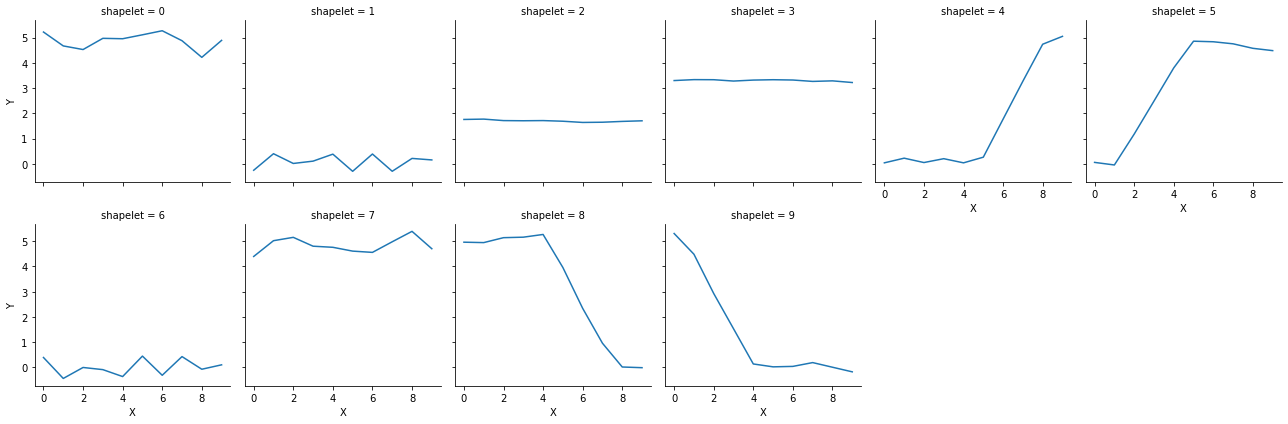

In [0]:
# retrieve the learnt shapelets
shapelets = shp_clf.get_shapelets()

from shapelets_lts.util import plot_sample_shapelets
plot_sample_shapelets(shapelets=shapelets, sample_size=36)

In [0]:
len(shapelets)

10

In [0]:
shapelets #questi sono i valori che compongono le shaplet

[array([ 5.30688672,  4.48622996,  2.92931323,  1.53495141,  0.13825961,
         0.02437946,  0.04213028,  0.19267785,  0.00933868, -0.17356646]),
 array([3.30033463, 3.33717607, 3.33370569, 3.28043424, 3.31914683,
        3.3336663 , 3.32147155, 3.26639205, 3.28842798, 3.22218183]),
 array([ 0.39479182, -0.43532758, -0.00070383, -0.08617   , -0.36042237,
         0.44998108, -0.30976629,  0.43028597, -0.0705207 ,  0.10406495]),
 array([-0.25350549,  0.40147858,  0.01583167,  0.1078209 ,  0.38454466,
        -0.29530212,  0.38979547, -0.29360741,  0.21567599,  0.15584628]),
 array([0.04037442, 0.22529334, 0.05177193, 0.20477346, 0.04011229,
        0.2645971 , 1.77277756, 3.27620945, 4.73943695, 5.05160013]),
 array([1.75917591, 1.77289433, 1.71409217, 1.70755197, 1.71429359,
        1.68874537, 1.6407982 , 1.64933602, 1.68206062, 1.7056097 ]),
 array([5.22300204, 4.67256599, 4.52904822, 4.97326313, 4.95715592,
        5.11281917, 5.27357678, 4.87899674, 4.2196563 , 4.89213715]),
 arr

## Shaplet Discovery 3

In [0]:
from pyts.transformation import ShapeletTransform

https://pyts.readthedocs.io/en/stable/generated/pyts.transformation.ShapeletTransform.html#pyts.transformation.ShapeletTransform

In [0]:
st = ShapeletTransform(n_shapelets=4, window_sizes=[5])
st.fit(X_train, y_train)

KeyboardInterrupt: 

In [0]:
len(st.shapelets_)

2

In [0]:
st.shapelets_

array([[2.28900000e+01, 2.61750000e+01, 5.79250000e+02, 9.97500000e+02,
        4.51818483e-03],
       [2.28900000e+01, 2.60000000e+01, 5.64000000e+02, 9.97750000e+02,
        4.48775934e-03]])

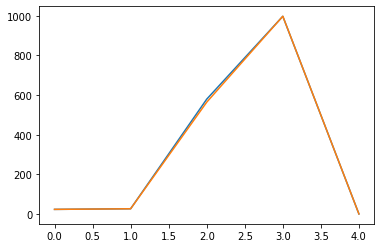

In [0]:
for s in st.shapelets_:
    plt.plot(s)

plt.show()

The indices for the corresponding shapelets in the training set. The first column consists of the indices of the samples. The second column consists of the starting indices (included) of the shapelets. The third column consists of the ending indices (excluded) of the shapelets.

In [0]:
st.indices_

array([[5143,    0,    5],
       [ 223,    0,    5]], dtype=int64)

In [0]:
X[2][55:63]

array([], dtype=float64)

In [0]:
st.scores_

array([0.4430872 , 0.44344425])

## Shaplet Discovery 4

In [0]:
from pyts.classification import LearningShapelets

https://pyts.readthedocs.io/en/stable/generated/pyts.classification.LearningShapelets.html#pyts.classification.LearningShapelets

In [0]:
shp_clf = LearningShapelets(random_state=42, tol=0.01)

In [0]:
shp_clf.fit(X, y)

KeyboardInterrupt: 

In [0]:
len(shp_clf.shapelets_[0])

78

In [0]:
from pyts.utils import windowed_view

In [0]:
# Select three shapelets
sel_shapelets = np.asarray([shp_clf.shapelets_[0, 0], 
                        shp_clf.shapelets_[0, 1], 
                        shp_clf.shapelets_[0, 2]])

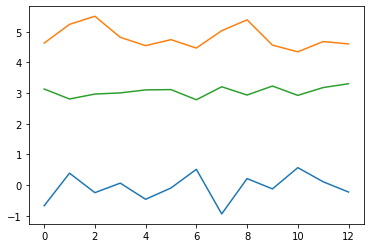

In [0]:
plt.plot(sel_shapelets[0])
plt.plot(sel_shapelets[1])
plt.plot(sel_shapelets[2])

plt.show()

In [0]:
# Derive the distances between the time series and a shapelets
shapelet_size = sel_shapelets.shape[1]
X_window = windowed_view(X, window_size=shapelet_size, window_step=1)
X_dist = np.mean((X_window[:, :, None] - sel_shapelets[None, :]) ** 2, axis=3).min(axis=1)

In [0]:
X_dist

array([[0.59737952, 1.28796807, 0.50621251],
       [0.63559338, 0.4301728 , 3.68841088],
       [0.34604746, 0.70732199, 0.83927128],
       [0.42395593, 0.3064432 , 2.19689706],
       [0.31660035, 0.64211339, 0.61607883],
       [0.85146216, 1.08379101, 0.65999991],
       [0.36735134, 0.2589913 , 1.02243509],
       [0.44191696, 0.46102256, 2.86596557],
       [0.67295427, 0.66323123, 0.69942267],
       [0.50436926, 0.51245606, 2.60002204],
       [0.66321681, 0.64157927, 0.17103595],
       [0.21831585, 1.27528248, 1.03761191]])

In [0]:
np.mean(X_dist[y == 0], axis=0)

array([0.50145888, 0.42752366, 2.83782389])

In [0]:
np.mean(X_dist[y == 1], axis=0)

array([0.51483316, 0.91610453, 0.75327833])

In [0]:
np.mean(X_dist[y == 2], axis=0)

array([0.49349878, 0.72396516, 0.63473871])

# Matrix Profile

https://github.com/target/matrixprofile-ts

https://github.com/TDAmeritrade/stumpy

In [0]:
from matrixprofile import *

In [0]:
ts = df['Temperature']

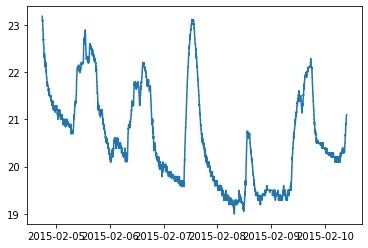

In [0]:
plt.plot(ts)
plt.show()

C:\Users\Asia\Anaconda3\lib\site-packages\matrixprofile\utils.py:68: RuntimeWarning: invalid value encountered in sqrt
  movstd = np.sqrt(segSumSq / m - (segSum/m) ** 2)
C:\Users\Asia\Anaconda3\lib\site-packages\matrixprofile\utils.py:177: RuntimeWarning: divide by zero encountered in true_divide
  res = 2*m*(1-(dot-m*mean*q_mean)/(m*std*q_std))
C:\Users\Asia\Anaconda3\lib\site-packages\matrixprofile\utils.py:177: RuntimeWarning: invalid value encountered in true_divide
  res = 2*m*(1-(dot-m*mean*q_mean)/(m*std*q_std))
C:\Users\Asia\Anaconda3\lib\site-packages\matrixprofile\distanceProfile.py:118: RuntimeWarning: invalid value encountered in sqrt
  distanceProfile = np.real(np.sqrt(mass(query,tsB).astype(complex)))
C:\Users\Asia\Anaconda3\lib\site-packages\matrixprofile\matrixProfile.py:249: RuntimeWarning: invalid value encountered in less
  idsToUpdate = distanceProfile < mp
C:\Users\Asia\Anaconda3\lib\site-packages\matrixprofile\utils.py:200: RuntimeWarning: divide by zero encounter

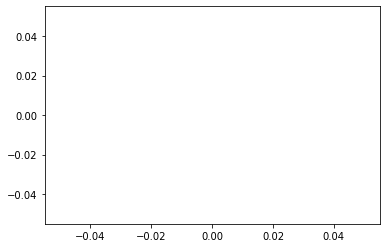

In [0]:
w = 2
mp, mpi = matrixProfile.stomp(ts.values, w)
plt.plot(mp)
plt.show()

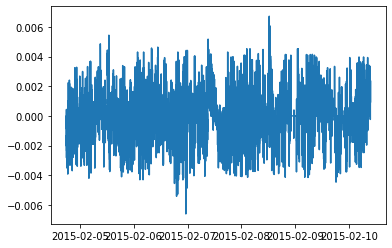

In [0]:
window = 5
ts_log_mov_diff = pd.Series(np.log(ts) - np.log(ts).rolling(window, center=False).mean(), index=ts.index)

plt.plot(ts_log_mov_diff)
plt.show()

C:\Users\Asia\Anaconda3\lib\site-packages\matrixprofile\utils.py:68: RuntimeWarning: invalid value encountered in sqrt
  movstd = np.sqrt(segSumSq / m - (segSum/m) ** 2)
C:\Users\Asia\Anaconda3\lib\site-packages\matrixprofile\distanceProfile.py:118: RuntimeWarning: invalid value encountered in sqrt
  distanceProfile = np.real(np.sqrt(mass(query,tsB).astype(complex)))
C:\Users\Asia\Anaconda3\lib\site-packages\matrixprofile\matrixProfile.py:249: RuntimeWarning: invalid value encountered in less
  idsToUpdate = distanceProfile < mp
C:\Users\Asia\Anaconda3\lib\site-packages\matrixprofile\distanceProfile.py:126: RuntimeWarning: invalid value encountered in sqrt
  distanceProfile = np.real(np.sqrt(res.astype(complex)))


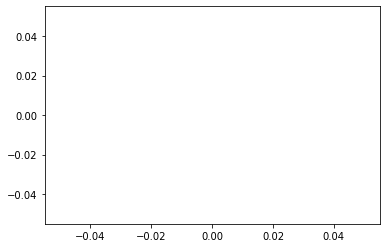

In [0]:
w = 10
mp, mpi = matrixProfile.stomp(ts_log_mov_diff.values[11:], w)

plt.plot(mp)
plt.show()

C:\Users\Asia\Anaconda3\lib\site-packages\matrixprofile\utils.py:68: RuntimeWarning: invalid value encountered in sqrt
  movstd = np.sqrt(segSumSq / m - (segSum/m) ** 2)
C:\Users\Asia\Anaconda3\lib\site-packages\matrixprofile\utils.py:177: RuntimeWarning: divide by zero encountered in true_divide
  res = 2*m*(1-(dot-m*mean*q_mean)/(m*std*q_std))
C:\Users\Asia\Anaconda3\lib\site-packages\matrixprofile\utils.py:177: RuntimeWarning: invalid value encountered in true_divide
  res = 2*m*(1-(dot-m*mean*q_mean)/(m*std*q_std))
C:\Users\Asia\Anaconda3\lib\site-packages\matrixprofile\distanceProfile.py:118: RuntimeWarning: invalid value encountered in sqrt
  distanceProfile = np.real(np.sqrt(mass(query,tsB).astype(complex)))
C:\Users\Asia\Anaconda3\lib\site-packages\matrixprofile\matrixProfile.py:249: RuntimeWarning: invalid value encountered in less
  idsToUpdate = distanceProfile < mp
C:\Users\Asia\Anaconda3\lib\site-packages\matrixprofile\utils.py:200: RuntimeWarning: divide by zero encounter

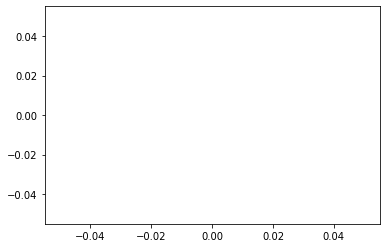

In [0]:
w = 3
mp, mpi = matrixProfile.stomp(ts.values, w)

plt.plot(mp)
plt.show()

# Motif Discovery

In [0]:
#mp_adj = np.append(mp[0],np.zeros(m-1)+np.nan)

mo, mod  = motifs.motifs(ts.values, (mp, mpi), max_motifs=5)

C:\Users\Asia\Anaconda3\lib\site-packages\matrixprofile\utils.py:68: RuntimeWarning: invalid value encountered in sqrt
  movstd = np.sqrt(segSumSq / m - (segSum/m) ** 2)
C:\Users\Asia\Anaconda3\lib\site-packages\matrixprofile\utils.py:177: RuntimeWarning: divide by zero encountered in true_divide
  res = 2*m*(1-(dot-m*mean*q_mean)/(m*std*q_std))
C:\Users\Asia\Anaconda3\lib\site-packages\matrixprofile\utils.py:177: RuntimeWarning: invalid value encountered in true_divide
  res = 2*m*(1-(dot-m*mean*q_mean)/(m*std*q_std))
C:\Users\Asia\Anaconda3\lib\site-packages\matrixprofile\distanceProfile.py:66: RuntimeWarning: invalid value encountered in sqrt
  distanceProfile = np.real(np.sqrt(mass(query,tsB).astype(complex)))


Parameters
- max_motifs: stop finding new motifs once we have max_motifs
- radius: For each motif found, find neighbors that are within radius*motif_mp of the first.
- n_neighbors: number of neighbors from the first to find. If it is None, find all.
- ex_zone: minimum distance between indices for after each subsequence is identified. Defaults to m/2 where m is the subsequence length. If ex_zone = 0, only the found index is exclude, if ex_zone = 1 then if idx is found as a motif idx-1, idx, idx+1 are excluded.

Returns
The function returns a tuple (top_motifs, distances) which are lists of the same length.

- top_motifs: This is a list of the indices found for each motif. The first index is the nth motif followed by all nearest neighbors found sorted by distances.
- distances: Minimum Matrix profile value for each motif set.

In [0]:
mo

[[0, 8], [2, 17], [10, 26], [12, 28]]

In [0]:
mod

[nan, nan, nan, nan]

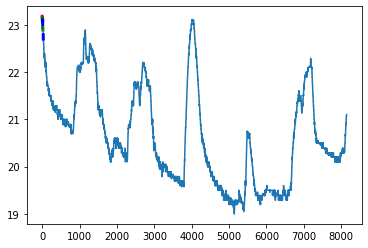

In [0]:
plt.plot(ts.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

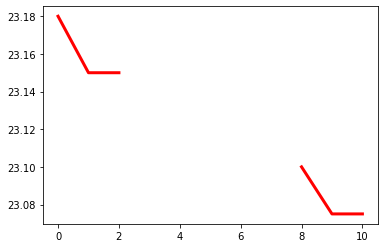

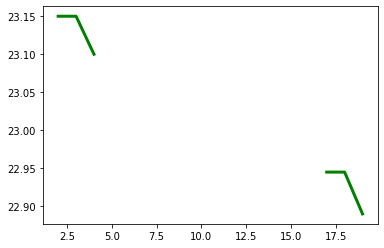

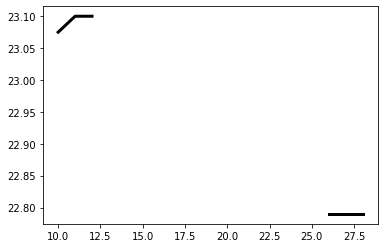

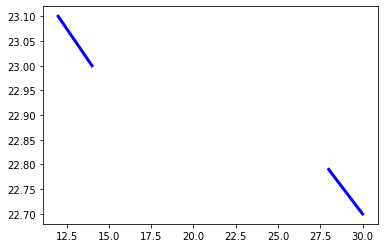

In [0]:
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

# Anomaly Discovery

In [0]:
from matrixprofile.discords import discords

Parameters  
- mp: matrix profile numpy array
- k: the number of discords to discover
- ex_zone: the number of samples to exclude and set to Inf on either side of a found discord    

Returns 
 - a list of indexes represent the discord starting locations. MaxInt indicates there were no more discords that could be found due to too many exclusions or profile being too small. Discord start indices are sorted by highest matrix profile value.

In [0]:
anoms = discords(mp, ex_zone=3, k=5)

OverflowError: Python int too large to convert to C long

In [0]:
anoms

NameError: name 'anoms' is not defined

NameError: name 'anoms' is not defined

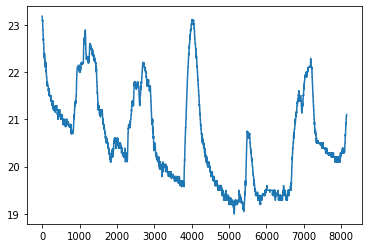

In [0]:
plt.plot(ts.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for a, c in zip(anoms, colors):
    a_shape = ts.values[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()